In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from statannot.statannot import add_stat_annotation

In [2]:
sns.set(style="whitegrid")
df = sns.load_dataset("tips")

### Boxplot non-hue

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+09
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Thur v.s. Fri: MWW RankSum two-sided P_val=6.477e-01 U_stat=6.305e+02
Thur v.s. Sat: MWW RankSum two-sided P_val=4.690e-02 U_stat=2.180e+03
Fri v.s. Sun: MWW RankSum two-sided P_val=2.680e-02 U_stat=4.835e+02


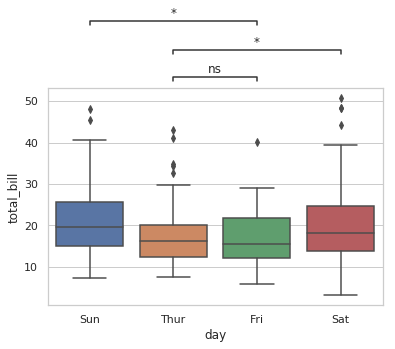

In [3]:
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    boxPairList=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")],
                    test='Mann-Whitney', textFormat='star', loc='outside', verbose=2)
plt.savefig('example1.png', dpi=300, bbox_inches='tight')

### Boxplot with hue

Thur_No v.s. Fri_No: t-test independent samples, P_val=7.425e-01 stat=-3.305e-01
Sat_Yes v.s. Sat_No: t-test independent samples, P_val=4.304e-01 stat=7.922e-01
Sun_No v.s. Thur_Yes: t-test independent samples, P_val=5.623e-01 stat=5.822e-01


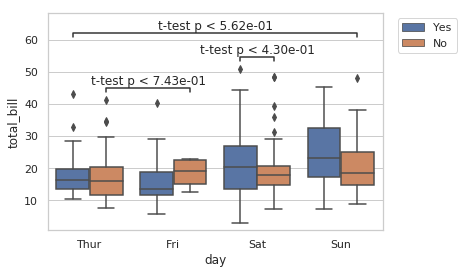

In [4]:
x = "day"
y = "total_bill"
hue = "smoker"
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y, hue=hue,
                    boxPairList=[(("Thur", "No"), ("Fri", "No")),
                                 (("Sat", "Yes"), ("Sat", "No")),
                                 (("Sun", "No"), ("Thur", "Yes"))
                                ],
                    test='t-test', textFormat='full', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example2.png', dpi=300, bbox_inches='tight')

### Boxplot with bucketed categories

In [5]:
df['tip_bucket'] = pd.cut(df['tip'], 3)
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_bucket
0,16.99,1.01,Female,No,Sun,Dinner,2,"(0.991, 4.0]"
1,10.34,1.66,Male,No,Sun,Dinner,3,"(0.991, 4.0]"
2,21.01,3.50,Male,No,Sun,Dinner,3,"(0.991, 4.0]"
3,23.68,3.31,Male,No,Sun,Dinner,2,"(0.991, 4.0]"
4,24.59,3.61,Female,No,Sun,Dinner,4,"(0.991, 4.0]"


In [6]:
tip_bucket_list = df['tip_bucket'].unique()
tip_bucket_list

[(0.991, 4.0], (4.0, 7.0], (7.0, 10.0]]
Categories (3, interval[float64]): [(0.991, 4.0] < (4.0, 7.0] < (7.0, 10.0]]

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+09
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Sat_(7.0, 10.0] v.s. Fri_(0.991, 4.0]: t-test independent samples, P_val=6.176e-07 stat=7.490e+00


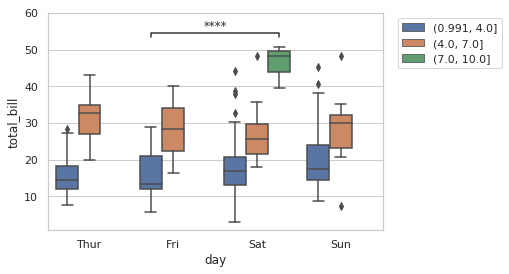

In [7]:
x = "day"
y = "total_bill"
hue = "tip_bucket"
data = df
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
boxPlotter = sns.categorical._BoxPlotter(x, y, hue, data, order, hue_order=None,
                                         orient=None, width=.8, color=None, palette=None, saturation=.75,
                                         dodge=True, fliersize=5, linewidth=None)
add_stat_annotation(ax, data=df, x=x, y=y, hue=hue,
                    boxPairList=[(("Sat", tip_bucket_list[2]), ("Fri", tip_bucket_list[0]))],
                    test='t-test', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))